## Main Objective of the problem is to check wether the employe is going to stay inside the same company or leave the company ,
'1' signifies that the empoye is going toleave the compnany and '0' signifies employe is going to stay inside the same company

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading the dataset
df1=pd.read_csv('aug_train.csv')
df1

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
df1['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [4]:
df1.shape

(19158, 14)

In [5]:
[df1.columns]


[Index(['enrollee_id', 'city', 'city_development_index', 'gender',
        'relevent_experience', 'enrolled_university', 'education_level',
        'major_discipline', 'experience', 'company_size', 'company_type',
        'last_new_job', 'training_hours', 'target'],
       dtype='object')]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
'''
since there are large missing values in 
gender ,major_discpline,company_size,company_type 
its bettr to drop them beacuse pf prediction made looks not correct
'''


'\nsince there are large missing values in \ngender ,major_discpline,company_size,company_type \nits bettr to drop them beacuse pf prediction made looks not correct\n'

In [8]:
df2=df1.drop(columns=['gender','major_discipline','company_size','company_type'],axis=1)

In [9]:
df2

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
3,33241,city_115,0.789,No relevent experience,NaN,Graduate,<1,never,52,1.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [10]:
df3=df2.dropna()
df3

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  object 
 2   city_development_index  18014 non-null  float64
 3   relevent_experience     18014 non-null  object 
 4   enrolled_university     18014 non-null  object 
 5   education_level         18014 non-null  object 
 6   experience              18014 non-null  object 
 7   last_new_job            18014 non-null  object 
 8   training_hours          18014 non-null  int64  
 9   target                  18014 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.5+ MB


In [12]:
df3

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [13]:
df3.city.value_counts()

city_103    4194
city_21     2454
city_16     1471
city_114    1254
city_160     817
            ... 
city_111       3
city_8         2
city_129       2
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [14]:
df3['city']=df3['city'].apply(lambda x: int(x.split('_')[1]))

<ipython-input-14-ca4504c459c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['city']=df3['city'].apply(lambda x: int(x.split('_')[1]))


In [15]:
df3['city']

0        103
1         40
2         21
4        162
5        176
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 18014, dtype: int64

In [16]:
df3

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
4,666,162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
5,21651,176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [17]:
df3[['relevent_experience','enrolled_university','education_level']]=df3[['relevent_experience','enrolled_university','education_level']].apply(LabelEncoder().fit_transform)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
df3

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,103,0.920,0,2,0,>20,1,36,1.0
1,29725,40,0.776,1,2,0,15,>4,47,0.0
2,11561,21,0.624,1,0,0,5,never,83,0.0
4,666,162,0.767,0,2,2,>20,4,8,0.0
5,21651,176,0.764,0,1,0,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1,2,0,14,1,42,1.0
19154,31398,103,0.920,0,2,0,14,4,52,1.0
19155,24576,103,0.920,0,2,0,>20,4,44,0.0
19156,5756,65,0.802,0,2,1,<1,2,97,0.0


In [19]:
df3[['experience']]

,experience
0,>20
1,15
2,5
4,>20
5,11
...,...
19153,14
19154,14
19155,>20
19156,<1


In [20]:
df3.loc[df3['experience']=='>20','experience']=20

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [21]:
df3.experience.value_counts()

20    3182
5     1337
4     1298
3     1223
6     1143
2      997
7      982
10     946
9      936
8      768
15     668
11     649
14     569
16     488
12     475
1      475
<1     451
13     387
17     331
19     294
18     273
20     142
Name: experience, dtype: int64

In [22]:
df3.loc[df3['experience']=='<1','experience']=1

In [23]:
df3['experience']=df3['experience'].astype(int)

<ipython-input-23-ee0699350c56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['experience']=df3['experience'].astype(int)


In [24]:
df3[['experience']].value_counts()

experience
20            3324
5             1337
4             1298
3             1223
6             1143
2              997
7              982
10             946
9              936
1              926
8              768
15             668
11             649
14             569
16             488
12             475
13             387
17             331
19             294
18             273
dtype: int64

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  int64  
 2   city_development_index  18014 non-null  float64
 3   relevent_experience     18014 non-null  int64  
 4   enrolled_university     18014 non-null  int64  
 5   education_level         18014 non-null  int64  
 6   experience              18014 non-null  int64  
 7   last_new_job            18014 non-null  object 
 8   training_hours          18014 non-null  int64  
 9   target                  18014 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.5+ MB


In [26]:
df3['last_new_job'].value_counts()

1        7789
>4       3210
2        2827
never    2187
4        1010
3         991
Name: last_new_job, dtype: int64

In [27]:
df3['last_new_job']

0            1
1           >4
2        never
4            4
5            1
         ...  
19153        1
19154        4
19155        4
19156        2
19157        1
Name: last_new_job, Length: 18014, dtype: object

In [28]:
df3.loc[df3['last_new_job']=='never','last_new_job']=0


In [29]:
df3.loc[df3['last_new_job']=='>4','last_new_job']=4

In [30]:
df3['last_new_job'].value_counts()

1    7789
4    3210
2    2827
0    2187
4    1010
3     991
Name: last_new_job, dtype: int64

In [31]:
df3['last_new_job'].value_counts()

1    7789
4    3210
2    2827
0    2187
4    1010
3     991
Name: last_new_job, dtype: int64

In [32]:
df4 =df3.copy()

In [33]:
df4

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,103,0.920,0,2,0,20,1,36,1.0
1,29725,40,0.776,1,2,0,15,4,47,0.0
2,11561,21,0.624,1,0,0,5,0,83,0.0
4,666,162,0.767,0,2,2,20,4,8,0.0
5,21651,176,0.764,0,1,0,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1,2,0,14,1,42,1.0
19154,31398,103,0.920,0,2,0,14,4,52,1.0
19155,24576,103,0.920,0,2,0,20,4,44,0.0
19156,5756,65,0.802,0,2,1,1,2,97,0.0


In [34]:
df4.describe()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target
count,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000
mean,16903.699734,80.260242,0.831728,0.267792,1.545742,0.706395,10.130843,65.347896,0.245420
std,9665.557267,46.226282,0.122115,0.442821,0.799010,1.001806,6.448462,60.059220,0.430348
min,1.000000,1.000000,0.448000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,8528.750000,21.000000,0.745000,0.000000,1.000000,0.000000,5.000000,23.000000,0.000000
50%,17012.500000,101.000000,0.910000,0.000000,2.000000,0.000000,9.000000,47.000000,0.000000
75%,25326.250000,103.000000,0.920000,1.000000,2.000000,2.000000,16.000000,88.000000,0.000000
max,33380.000000,180.000000,0.949000,1.000000,2.000000,4.000000,20.000000,336.000000,1.000000


In [35]:
df4 =df4.drop(columns=['enrollee_id','city'])

In [36]:
df4

,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,0,2,0,20,1,36,1.0
1,0.776,1,2,0,15,4,47,0.0
2,0.624,1,0,0,5,0,83,0.0
4,0.767,0,2,2,20,4,8,0.0
5,0.764,0,1,0,11,1,24,1.0
...,...,...,...,...,...,...,...,...
19153,0.878,1,2,0,14,1,42,1.0
19154,0.920,0,2,0,14,4,52,1.0
19155,0.920,0,2,0,20,4,44,0.0
19156,0.802,0,2,1,1,2,97,0.0


In [37]:
from sklearn.preprocessing import MinMaxScaler
df4[['training_hours']]=(MinMaxScaler().fit_transform(df4[['training_hours']]))

In [38]:
df4

,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,0,2,0,20,1,0.104478,1.0
1,0.776,1,2,0,15,4,0.137313,0.0
2,0.624,1,0,0,5,0,0.244776,0.0
4,0.767,0,2,2,20,4,0.020896,0.0
5,0.764,0,1,0,11,1,0.068657,1.0
...,...,...,...,...,...,...,...,...
19153,0.878,1,2,0,14,1,0.122388,1.0
19154,0.920,0,2,0,14,4,0.152239,1.0
19155,0.920,0,2,0,20,4,0.128358,0.0
19156,0.802,0,2,1,1,2,0.286567,0.0


In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18014 non-null  float64
 1   relevent_experience     18014 non-null  int64  
 2   enrolled_university     18014 non-null  int64  
 3   education_level         18014 non-null  int64  
 4   experience              18014 non-null  int64  
 5   last_new_job            18014 non-null  object 
 6   training_hours          18014 non-null  float64
 7   target                  18014 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.2+ MB


In [40]:
df4['last_new_job']=df4['last_new_job'].astype(int)

In [41]:
df4

,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,0,2,0,20,1,0.104478,1.0
1,0.776,1,2,0,15,4,0.137313,0.0
2,0.624,1,0,0,5,0,0.244776,0.0
4,0.767,0,2,2,20,4,0.020896,0.0
5,0.764,0,1,0,11,1,0.068657,1.0
...,...,...,...,...,...,...,...,...
19153,0.878,1,2,0,14,1,0.122388,1.0
19154,0.920,0,2,0,14,4,0.152239,1.0
19155,0.920,0,2,0,20,4,0.128358,0.0
19156,0.802,0,2,1,1,2,0.286567,0.0


<AxesSubplot:xlabel='relevent_experience', ylabel='target'>

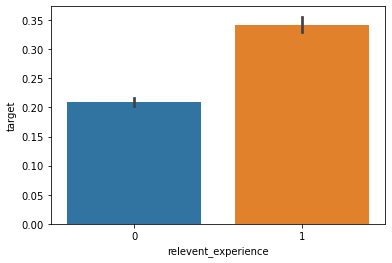

In [42]:
## Analysing the data
sns.barplot(x='relevent_experience' ,y='target',data=df4)

<AxesSubplot:xlabel='experience', ylabel='target'>

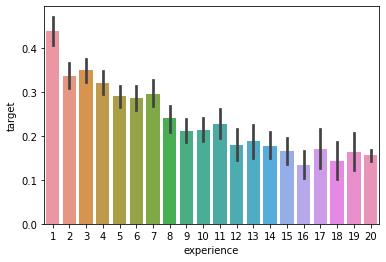

In [43]:
sns.barplot(data=df4 ,x='experience',y='target')

<AxesSubplot:xlabel='target', ylabel='experience'>

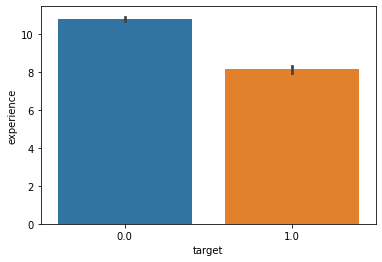

In [44]:
sns.barplot(x='target',y='experience',data=df4)

In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18014 non-null  float64
 1   relevent_experience     18014 non-null  int64  
 2   enrolled_university     18014 non-null  int64  
 3   education_level         18014 non-null  int64  
 4   experience              18014 non-null  int64  
 5   last_new_job            18014 non-null  int64  
 6   training_hours          18014 non-null  float64
 7   target                  18014 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.9 MB


In [46]:
## splitting of the data 
x=df4.iloc[:,:-1]
y=df4[['target']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [47]:
x.shape

(18014, 7)

In [48]:
x_train.shape

(13510, 7)

In [49]:
x_test.shape

(4504, 7)

In [50]:
## importing algorithms
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [51]:
## testing models
model1=LogisticRegression()
model2=KNeighborsClassifier()
model3=DecisionTreeClassifier()
model4=RandomForestClassifier(n_estimators= 409,
 min_samples_split= 4,
 max_depth= 8,
 criterion= 'gini')

In [53]:
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
y_pred1

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
## model evaluation 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      3381
         1.0       0.57      0.22      0.32      1123

    accuracy                           0.77      4504
   macro avg       0.68      0.58      0.59      4504
weighted avg       0.73      0.77      0.72      4504



In [56]:
## checking for model2
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

<ipython-input-56-c41e3f48bab5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model2.fit(x_train,y_train)


In [57]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      3381
         1.0       0.46      0.26      0.33      1123

    accuracy                           0.74      4504
   macro avg       0.62      0.58      0.59      4504
weighted avg       0.70      0.74      0.71      4504



In [58]:
##checking for model3
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      3381
         1.0       0.38      0.39      0.38      1123

    accuracy                           0.69      4504
   macro avg       0.59      0.59      0.59      4504
weighted avg       0.69      0.69      0.69      4504



In [59]:
## model4
model4.fit(x_train,y_train)
y_pred4= model4.predict(x_test)
print(classification_report(y_test,y_pred4))


<ipython-input-59-009f7fccdd6f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(x_train,y_train)


              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      3381
         1.0       0.61      0.37      0.46      1123

    accuracy                           0.78      4504
   macro avg       0.71      0.65      0.66      4504
weighted avg       0.76      0.78      0.76      4504



In [60]:
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

[[3112  269]
 [ 707  416]]
0.783303730017762


In [64]:
## hyper Parameter tuning
params={'n_estimators':range(0,500),
    'criterion':['gini','entropy'],
    'max_depth':range(0,100),
    'min_samples_split':[2,4,5,6,7,8,9]}
from sklearn.model_selection import RandomizedSearchCV
RCV=RandomizedSearchCV(model4,params,n_iter=20,cv=5)
RCV.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(0, 100),
                                        'min_samples_split': [2, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': range(0, 500)})

In [65]:
RCV.best_params_

{'n_estimators': 409,
 'min_samples_split': 4,
 'max_depth': 8,
 'criterion': 'gini'}

In [175]:
from sklearn.ensemble import BaggingClassifier

In [176]:
model5=BaggingClassifier(base_estimator=model4)
model5.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        min_samples_split=4,
                                                        n_estimators=409))

In [177]:
y_pred5=model5.predict(x_test)

In [178]:
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.87      3381
         1.0       0.61      0.36      0.46      1123

    accuracy                           0.78      4504
   macro avg       0.71      0.64      0.66      4504
weighted avg       0.76      0.78      0.76      4504

[[3125  256]
 [ 716  407]]
0.7841918294849023


In [179]:
model6 = GradientBoostingClassifier()
model6.fit(x_train,y_train)
y_pred6= model6.predict(x_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [180]:
print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      3381
         1.0       0.62      0.40      0.49      1123

    accuracy                           0.79      4504
   macro avg       0.72      0.66      0.68      4504
weighted avg       0.77      0.79      0.77      4504

[[3103  278]
 [ 672  451]]
0.7890763765541741


In [181]:
from xgboost import XGBRFClassifier
model7=XGBRFClassifier()


In [182]:
model7.fit(x_train,y_train)
y_pred7=model7.predict(x_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [156]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18014 non-null  int64  
 1   city_development_index  18014 non-null  float64
 2   relevent_experience     18014 non-null  int64  
 3   enrolled_university     18014 non-null  int64  
 4   education_level         18014 non-null  int64  
 5   experience              18014 non-null  int64  
 6   last_new_job            18014 non-null  object 
 7   training_hours          18014 non-null  float64
 8   target                  18014 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 2.0+ MB


In [183]:
print(classification_report(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
print(accuracy_score(y_test,y_pred7))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      3381
         1.0       0.61      0.40      0.49      1123

    accuracy                           0.79      4504
   macro avg       0.72      0.66      0.68      4504
weighted avg       0.77      0.79      0.77      4504

[[3098  283]
 [ 671  452]]
0.7881882770870338
